<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/3_top_purchased_products_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 가장 많이/적게(수량/금액) 팔린 제품

* 수량 기준과 금액 기준으로 많이 팔린 제품과 적게 팔린 제품 분석
* 예상대로 판매가 이루어지는지, 어떤 제품에 집중할지 등 모니터링 및 분석

#### 수량 기준 최다/최저 판매 제품 분석

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Mysql 데이터베이스 연결
conn = mysql.connector.connect(
  host = 'localhost',
  user='root',
  password = 'password',
  database = 'classicmodels'
)

# 가장 잘 팔리는 제품 분석 쿼리 실행
top_products_query = """
SELECT p.productCode, p.productName, sum(od.quantityOrdered) as total_quantity
FROM products p
JOIN orderdetails od on od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY total_quantity DESC
LIMIT 5;
"""

# 가장 안 팔리는 제품 분석 쿼리 실행
bottom_products_query = """
SELECT p.productCode, p.productName, sum(od.quantityOrdered) as total_quantity
FROM products p
JOIN orderdetails od on od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY total_quantity ASC
LIMIT 5;
"""

top_products_df = pd.read_sql_query(top_products_query, conn)
bottom_products_df = pd.read_sql_query(bottom_products_query, conn)

display(top_products_df)
display(bottom_products_df)

# 연결 종료
conn.close()


C:\Users\user\AppData\Local\Temp\ipykernel_11452\3446591006.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products_df = pd.read_sql_query(top_products_query, conn)
C:\Users\user\AppData\Local\Temp\ipykernel_11452\3446591006.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bottom_products_df = pd.read_sql_query(bottom_products_query, conn)


,productCode,productName,total_quantity
0,S18_3232,1992 Ferrari 360 Spider red,1808.0
1,S18_1342,1937 Lincoln Berline,1111.0
2,S700_4002,American Airlines: MD-11S,1085.0
3,S18_3856,1941 Chevrolet Special Deluxe Cabriolet,1076.0
4,S50_1341,1930 Buick Marquette Phaeton,1074.0


,productCode,productName,total_quantity
0,S18_4933,1957 Ford Thunderbird,767.0
1,S24_1046,1970 Chevy Chevelle SS 454,803.0
2,S24_3969,1936 Mercedes Benz 500k Roadster,824.0
3,S18_2248,1911 Ford Town Car,832.0
4,S18_2870,1999 Indy 500 Monte Carlo SS,855.0


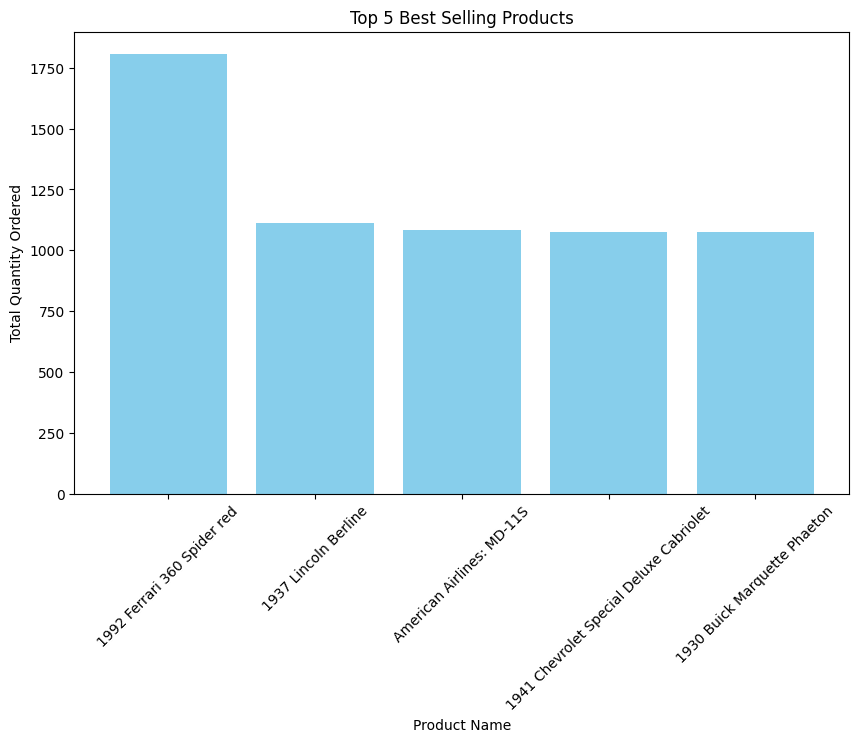

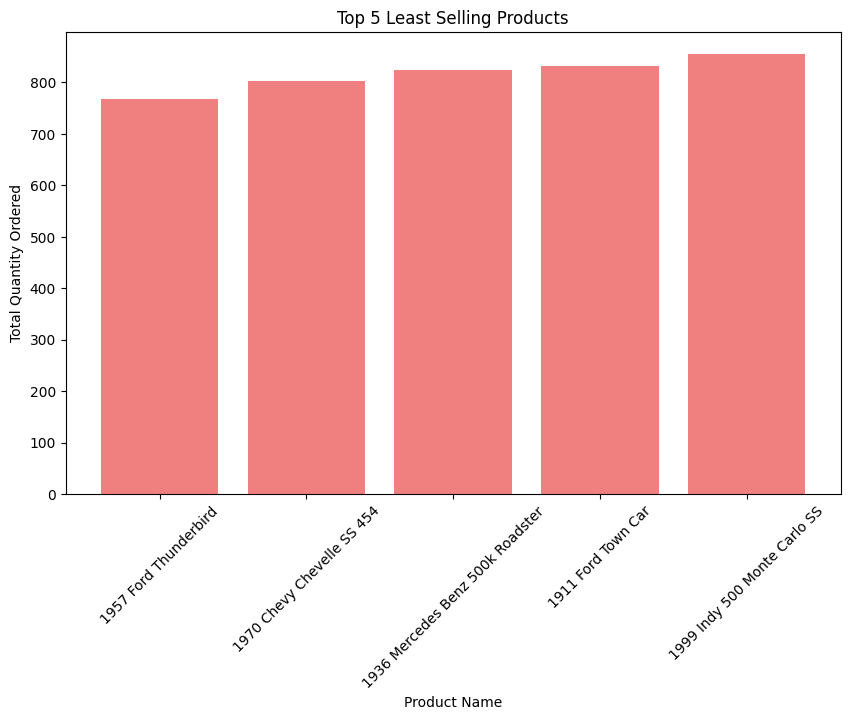

In [ ]:
# 가장 잘 팔리는 제품 시각화
plt.figure(figsize=(10,6))
plt.bar(top_products_df['productName'], top_products_df['total_quantity'], color = 'skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 5 Best Selling Products')
plt.xticks(rotation=45)
plt.show()

# 가장 안 팔리는 제품 시각화
plt.figure(figsize=(10,6))
plt.bar(bottom_products_df['productName'], bottom_products_df['total_quantity'], color = 'lightcoral')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 5 Least Selling Products')
plt.xticks(rotation=45)
plt.show()

#### 금액 기준 최대/최저 판매 제품 분석

In [ ]:
# Mysql 데이터베이스 연결
conn = mysql.connector.connect(
  host = 'localhost',
  user='root',
  password = 'password',
  database = 'classicmodels'
)

# 가장 많이 팔리는 제품 분석 쿼리 실행
top_products_query = """
SELECT p.productCode, p.productName, sum(od.quantityOrdered * od.priceEach) as total_sales
FROM products p
JOIN orderdetails od on od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY total_sales DESC
LIMIT 5;
"""

# 가장 안 팔리는 제품 분석 쿼리 실행
bottom_products_query = """
SELECT p.productCode, p.productName, sum(od.quantityOrdered * od.priceEach) as total_sales
FROM products p
JOIN orderdetails od on od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY total_sales ASC
LIMIT 5;
"""

top_products_df = pd.read_sql_query(top_products_query, conn)
bottom_products_df = pd.read_sql_query(bottom_products_query, conn)

display(top_products_df)
display(bottom_products_df)

# 연결 종료
conn.close()


C:\Users\user\AppData\Local\Temp\ipykernel_11452\1080202759.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products_df = pd.read_sql_query(top_products_query, conn)
C:\Users\user\AppData\Local\Temp\ipykernel_11452\1080202759.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bottom_products_df = pd.read_sql_query(bottom_products_query, conn)


,productCode,productName,total_sales
0,S18_3232,1992 Ferrari 360 Spider red,276839.98
1,S12_1108,2001 Ferrari Enzo,190755.86
2,S10_1949,1952 Alpine Renault 1300,190017.96
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,170686.00
4,S12_1099,1968 Ford Mustang,161531.48


,productCode,productName,total_sales
0,S24_1937,1939 Chevrolet Deluxe Coupe,28052.94
1,S24_3969,1936 Mercedes Benz 500k Roadster,29763.39
2,S24_2972,1982 Lamborghini Diablo,30972.87
3,S24_2840,1958 Chevy Corvette Limited Edition,31627.96
4,S32_2206,1982 Ducati 996 R,33268.76


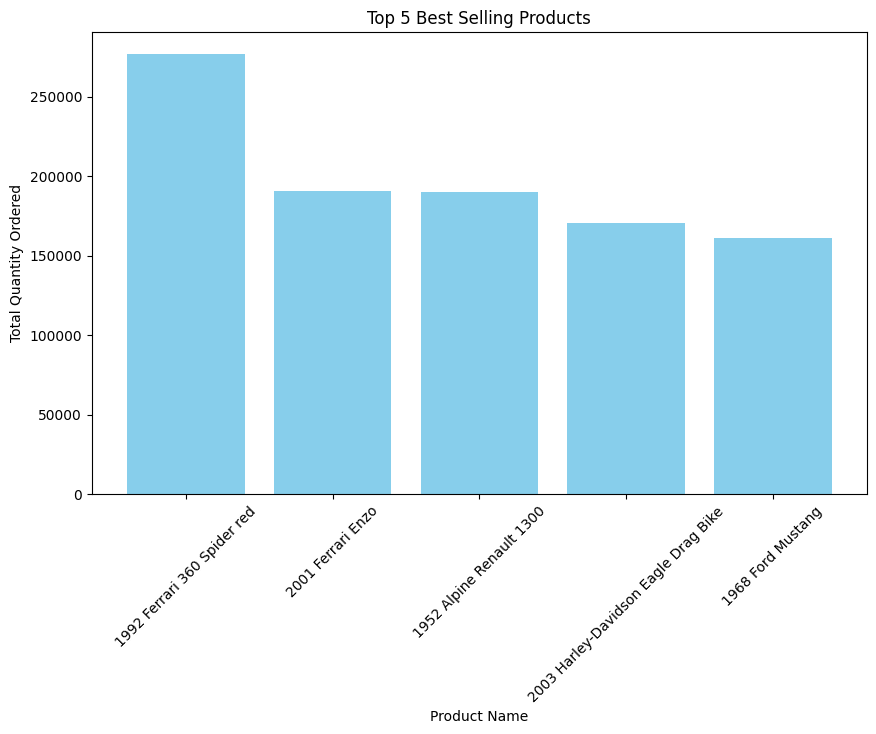

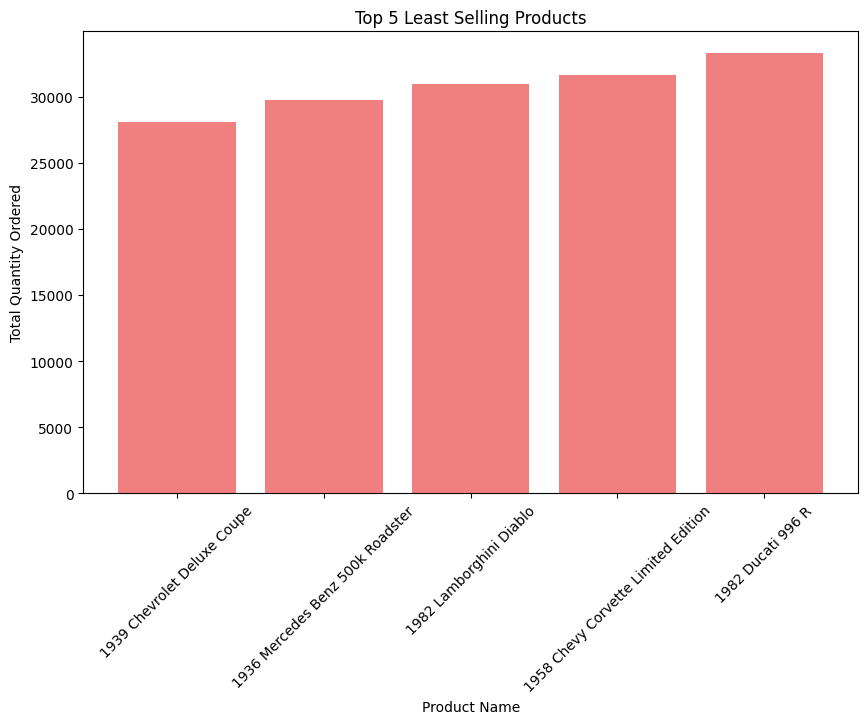

In [ ]:
# 가장 잘 팔리는 제품 시각화
plt.figure(figsize=(10,6))
plt.bar(top_products_df['productName'], top_products_df['total_sales'], color = 'skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 5 Best Selling Products')
plt.xticks(rotation=45)
plt.show()

# 가장 안 팔리는 제품 시각화
plt.figure(figsize=(10,6))
plt.bar(bottom_products_df['productName'], bottom_products_df['total_sales'], color = 'lightcoral')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 5 Least Selling Products')
plt.xticks(rotation=45)
plt.show()

#### 실행 결과
* **1992 Ferrari 360 Spider red** 상품은 판매 수량/금액 1위 제품
* **1937 Lincoln Berline**은 판매 수량 2위이지만 금액은 top5 순위에 없음. 저렴한 것으로 추측됨.

* **1957 Ford Thunderbird**는 판매 수량 최저 1위 제품이지만, 판매 금액 top5 순위에 없음. 단가가 비싼편으로 추측됨.